In [37]:
cd /Users/joepalmo/Desktop/cfa/SDU-preproc

/Users/joepalmo/Desktop/cfa/SDU-preproc


In [39]:
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt
from astropy.io import ascii
from astropy.io import fits
import os

# open source module found for converting MJD/JD to DateTimes
import jdutil as jd

# Ben's module -- THANKS BEN
import LCtools

# my preprocessing module
from preproc import *

import glob

In [66]:
# specify path to the lightcurve and spectrum
lc_path = "asteroid/Eros_LC.txt"

# object name (or abbreviation)
n = "Eros"

# resample length for time-sorted LC purposes
resample_len = '1min'

# LIGHT CURVE

## TIME-SORTED LIGHT CURVE

In [134]:
lc = pd.read_csv(lc_path, sep='|', names=['jd', 'mag', 'magerr'])

In [135]:
lc['mjd'] = jd.jd_to_mjd(lc['jd'])

In [136]:
time_preproc_lc = LC_timesort_preproc(lc[lc['mjd'].between(57630, 57630.5)], resample_len=resample_len)

In [137]:
print("The observations span",str(round(lc[lc['mjd'].between(57630, 57630.5)].mjd.max()-lc[lc['mjd'].between(57630, 57630.5)].mjd.min(), 2)),"days")

The observations span 0.19 days


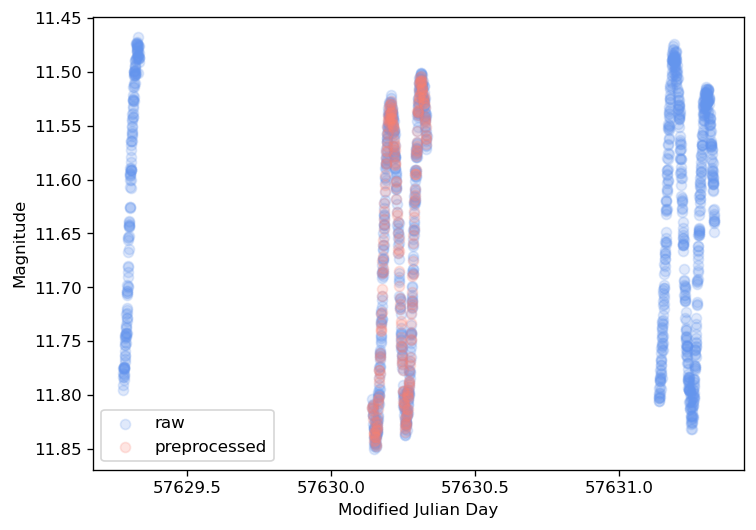

In [71]:
fig1 = plot_timesort(lc, time_preproc_lc)

In [139]:
len(time_preproc_lc.dropna())

242

In [77]:
# The average data play rate determined empirically from sonoUno is about 
# 8.5 data rows played per second. Therefore:
print("Estimated video time of "+ str(len(time_preproc_lc) / 8.5), "s")

Estimated video time of 32.0 s


## PHASED LIGHT CURVE

In [78]:
period, phase_preproc_lc, phasefit_preproc_lc = phase_LC(lc, bins=phase_bins(), rephased=False, flc=False, detrend=False, detrend_deg=3)

/Users/joepalmo/anaconda3/lib/python3.6/site-packages/astropy/units/quantity.py:477: RuntimeWarning: divide by zero encountered in log10
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [80]:
period

0.21978408411576467

In [132]:
# in hours
period * 24

5.274818018778352

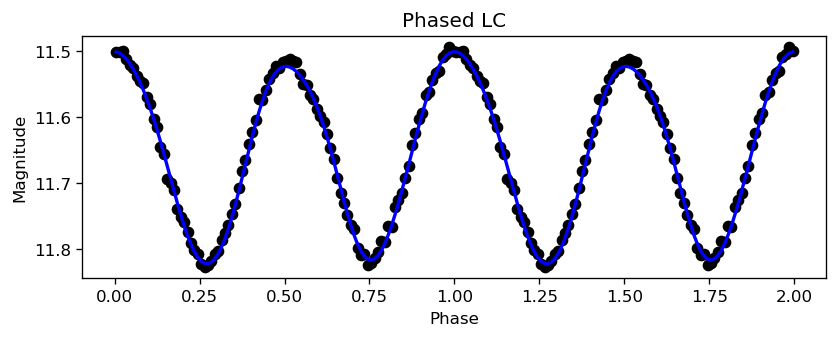

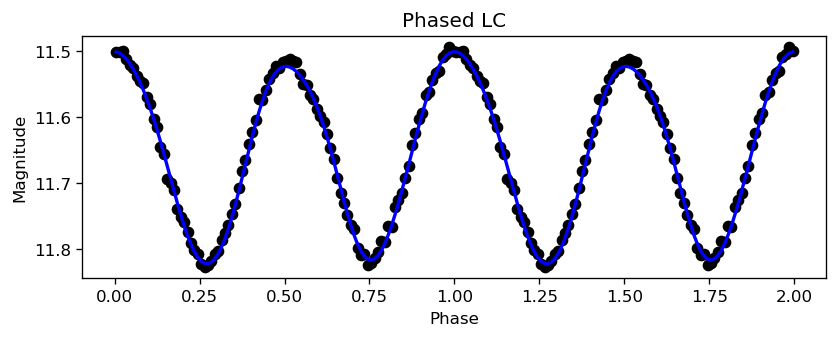

In [81]:
plot_phased(phase_preproc_lc, phasefit_preproc_lc)

# SPECTRA

In [82]:
spec_path = "asteroid/eros_spec.txt"

In [85]:
spec = pd.read_csv(spec_path, delimiter='\s+', names=['wavelength', 'flux', 'fluxerr', 'untitled'])

In [87]:
spec['wavelength'] = spec['wavelength']*(10**4)

In [93]:
spec = spec.replace(to_replace=-1, value=np.nan)

In [95]:
spec

,wavelength,flux,fluxerr,untitled
0,4350.0,0.7756,0.0116,1
1,4375.0,0.7901,0.0103,1
2,4400.0,0.7805,0.0092,1
3,4425.0,0.7942,0.0081,1
4,4450.0,0.8028,0.0072,1
...,...,...,...,...
527,24700.0,1.5277,0.0063,4
528,24750.0,1.5430,0.0068,3
529,24800.0,1.5662,0.0105,1
530,24850.0,1.5503,0.0077,3


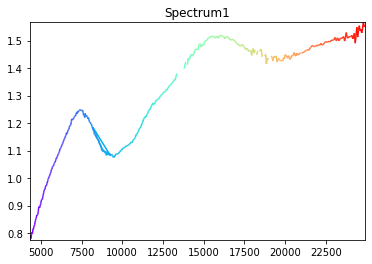

In [94]:
#raw data
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
fig, ax = plt.subplots()
x1,y1 = spec['wavelength'], spec['flux']
ax.set_xlim(x1.min(), x1.max())
ax.set_ylim(y1.min(), y1.max())
points = np.array([x1, y1]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(x1.min(), x1.max())
lc = LineCollection(segments, cmap='rainbow', norm=norm)
lc.set_array(x1)
ax.add_collection(lc)
ax.set_title('Spectrum1')
plt.show()

In [128]:
preproc_spec = spectra_preproc(spec, bins=np.arange(4350,9000,27))

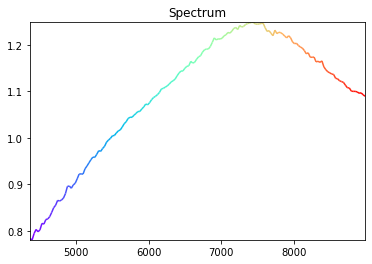

In [129]:
#preprocessed
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
fig, ax = plt.subplots()
x,y = preproc_spec['Wavelength'], preproc_spec['Flux']
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(x.min(), x.max())
lc = LineCollection(segments, cmap='rainbow', norm=norm)
lc.set_array(x)
ax.add_collection(lc)
ax.set_title('Spectrum')
plt.show()

In [130]:
# The average data play rate determined empirically from sonoUno is about 
# 8.5 data rows played per second. Therefore:
print("Estimated video time of "+ str(len(preproc_spec) / 8.5), "s")

Estimated video time of 20.235294117647058 s


# Save Preprocessed File

In [118]:
#create output directory
outdir = 'preproc/{}/'.format(n)
if not os.path.exists(outdir):
    os.makedirs(outdir)   

In [119]:
#save preprocessed files
time_preproc_lc.to_csv("preproc/{}/{}_LC_timesort.csv".format(n,n), index=False)
phase_preproc_lc.to_csv("preproc/{}/{}_LC_phasesort.csv".format(n,n), index=False)
phasefit_preproc_lc.to_csv("preproc/{}/{}_LC_phasefit.csv".format(n,n), index=False)
preproc_spec.to_csv("preproc/{}/{}_spec.csv".format(n,n), index=False)